In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
pd.options.display.float_format = '{}'.format

import warnings
warnings.filterwarnings('ignore')

# Feb 19

* Density plot
* Density plot(without single-element-group)
* Heatmap

In [185]:
# Prepare file
df = pd.read_csv("http://dada2020.xyz/dada/Data.csv", dtype=str)

In [186]:
df = df.iloc[:,0:11]
df[["Passive", "Active","Constructive","Interactive"]] = df[["Passive", "Active","Constructive","Interactive"]].apply(pd.to_numeric)
df = df.fillna(0)
df['Time'] = pd.to_datetime(df['Time stamp'])
df['ID'] = range(1538)

### Assign weight to PACI (1,2,3,4)

In [187]:
# assign weight to PACI (1,2,3,4)
df['Active'] = df['Active']*2
df['Constructive'] = df['Constructive']*3
df['Interactive'] = df['Interactive']*4

In [188]:
# split into different time zones
df_s1 = df[df['Time']<='2017-10-15'] #795
df_s2 = df[df['Time']>'2017-10-15'] #743
df_s1_t1 = df[df['Time']<='2017-09-20'] #412
df_s1_t2 = df[ (df['Time']>'2017-09-20') & (df['Time']<'2017-10-15') ] #383
df_s2_t1 = df[ (df['Time']>'2017-10-15')&(df['Time']<='2017-11-02') ] #437
df_s2_t2 = df[ (df['Time']>'2017-11-02') ] #306

# Density plot

### Define function for plotting

In [189]:
# distribution plot of mean PACI
PACI_mean_combine = []
def density_plot(tmp, ID):
    PACI_sum = tmp.groupby(ID)["Passive", "Active","Constructive","Interactive"].sum()
    Student_count = tmp.groupby(ID)['ID'].count()
    PACI_mean = PACI_sum.sum(axis=1)/Student_count
    plt.hist(PACI_mean)
    PACI_mean_combine.append(PACI_mean)

# distribution plot of ratio PACI
    a = PACI_sum.sum(axis=1)
    b = PACI_sum/a[:,None]
    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    ax.set_xlim(0,1)
    plt.hist(b['Active'], alpha=0.3, label='Active')
    plt.hist(b['Passive'], alpha=0.3, label='Passive')
    plt.hist(b['Constructive'], alpha=0.3, label='Constructive')
    plt.hist(b['Interactive'], alpha=0.3, label='Interactive')
    plt.legend()

### mean+ratio PACI by students in semester1 t1

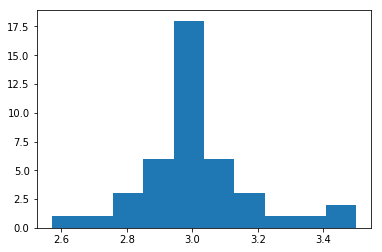

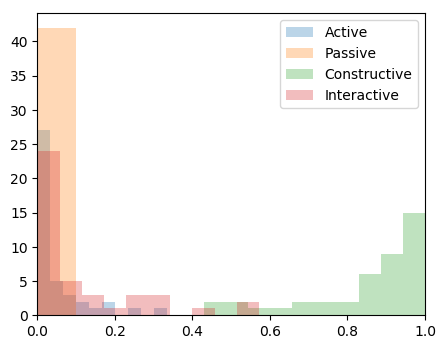

In [190]:
density_plot(df_s1_t1,['Student ID'])

### mean+ratio PACI by students in semester1 t2

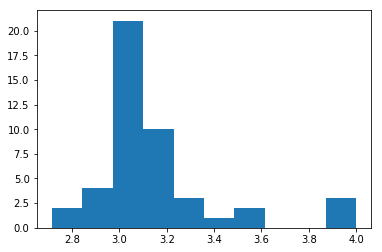

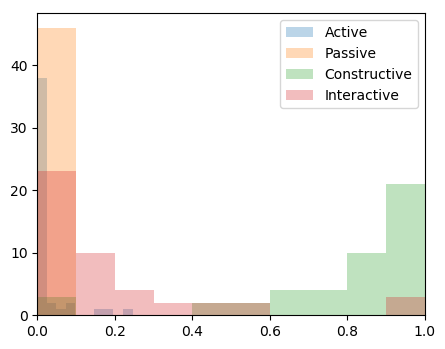

In [191]:
density_plot(df_s1_t2,['Student ID'])

### mean+ratio PACI by groups in semester1 t1

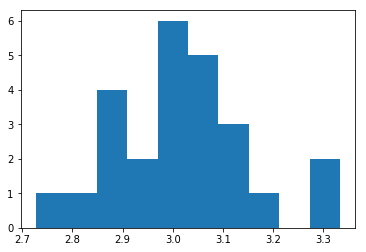

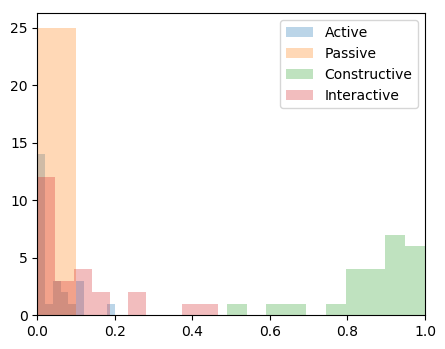

In [192]:
density_plot(df_s1_t1,['Group ID'])

### mean+ratio PACI by groups in semester1 t2

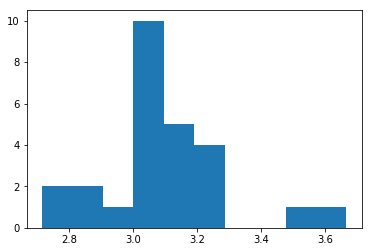

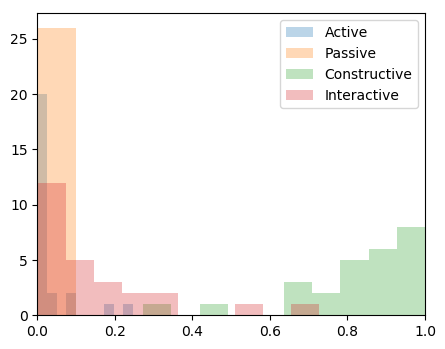

In [193]:
density_plot(df_s1_t2,['Group ID'])

### mean+ratio PACI by student in semester1

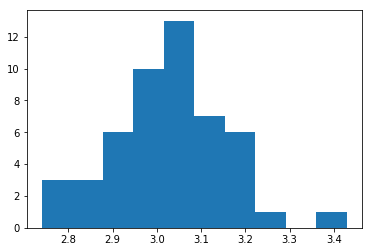

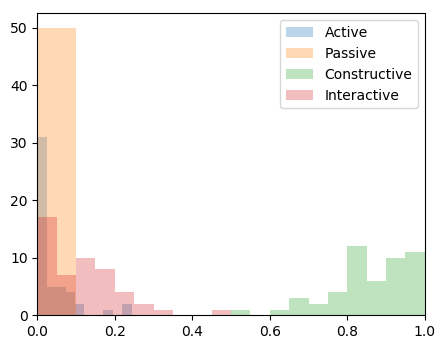

In [194]:
density_plot(df_s1,['Student ID'])

### mean+ratio PACI by student in semester2

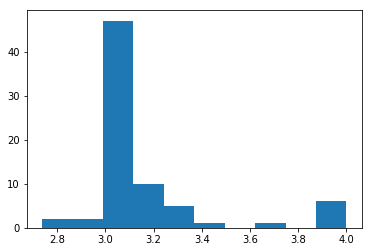

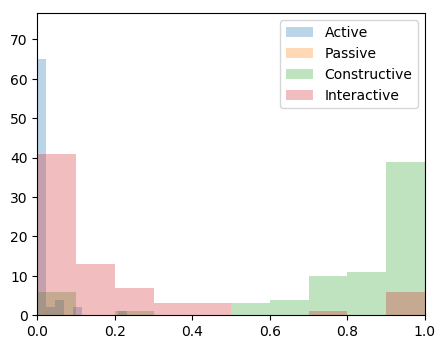

In [195]:
#mean PACI for each student in semester2 
density_plot(df_s2,['Student ID'])

### mean PACI  (distribution plots combined)

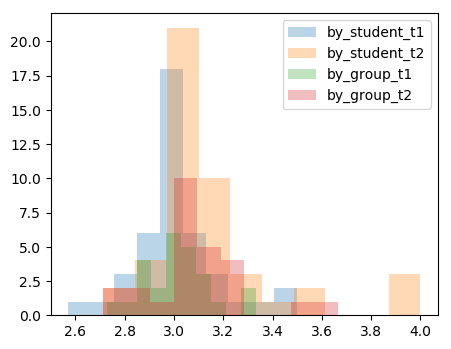

In [196]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
plt.hist(PACI_mean_combine[0], alpha=0.3, label='by_student_t1')
plt.hist(PACI_mean_combine[1], alpha=0.3, label='by_student_t2')
plt.hist(PACI_mean_combine[2], alpha=0.3, label='by_group_t1')
plt.hist(PACI_mean_combine[3], alpha=0.3, label='by_group_t2')
plt.legend()

### mean PACI (boxplots combined)

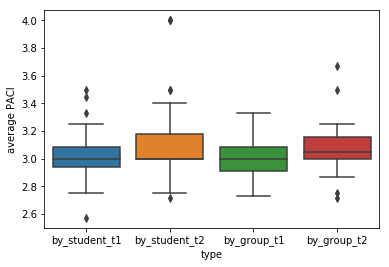

In [197]:
s1 = pd.DataFrame(PACI_mean_combine[0])
s1.columns=['average PACI']
s1.index.names = ['ID']
s1['type'] = 'by_student_t1'

s2 = pd.DataFrame(PACI_mean_combine[1])
s2.columns=['average PACI']
s2.index.names = ['ID']
s2['type'] = 'by_student_t2'

g1 = pd.DataFrame(PACI_mean_combine[2])
g1.columns=['average PACI']
g1.index.names = ['ID']
g1['type'] = 'by_group_t1'

g2 = pd.DataFrame(PACI_mean_combine[3])
g2.columns=['average PACI']
g2.index.names = ['ID']
g2['type'] = 'by_group_t2'

combine = pd.concat([s1, s2, g1, g2], axis=0, sort=False)
ax = sns.boxplot(x="type", y="average PACI", data=combine)

# Density plot (without single-element-group)
### Some groups contain only one student, need to be removed

In [198]:
df.groupby(['Group ID'])['Student ID'].unique()

Group ID
AJ                                      [458, 502, 081]
AK                                                [379]
AM                                           [527, 967]
AT                                           [892, 019]
BA                                           [062, 070]
BF                                                [228]
BS                                                [229]
CD                                                [714]
CG                                                [666]
CZ                                                [588]
EB                                      [428, 451, 649]
EI                                      [196, 493, 892]
EL                                                [338]
ER                                                [901]
EW                                           [365, 641]
FW                                                [019]
GC                                           [070, 306]
HM                                     

### Only keep groups containing more than one student

In [199]:
tmp = df.groupby(['Group ID'])['Student ID'].unique()
intergroup = []
groups = pd.DataFrame({'Group ID': tmp.index,'Student ID':tmp.values})
for i in range(len(groups)):
    if len(groups.iloc[i]['Student ID'])>1:
        intergroup.append(groups.iloc[i]['Group ID'])
df2 = df[df['Group ID'].isin(intergroup)]

In [200]:
# split into different time zones
df_s1 = df2[df2['Time']<='2017-10-15'] #795 -> 579
df_s2 = df2[df2['Time']>'2017-10-15'] #743 -> 502
df_s1_t1 = df2[df2['Time']<='2017-09-20'] #412 -> 314
df_s1_t2 = df2[ (df2['Time']>'2017-09-20') & (df['Time']<'2017-10-15') ] #383 -> 265
df_s2_t1 = df2[ (df2['Time']>'2017-10-15')&(df['Time']<='2017-11-02') ] #437 -> 272
df_s2_t2 = df2[ (df2['Time']>'2017-11-02') ] #306 -> 230

### Plot

In [201]:
PACI_mean_combine = []

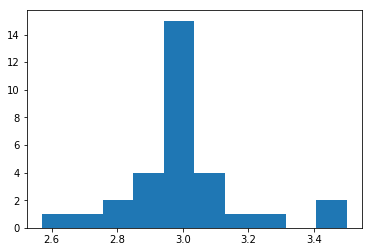

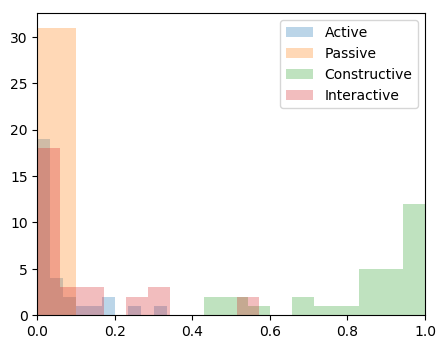

In [202]:
# mean+ratio PACI by student in semester1 t1
density_plot(df_s1_t1, ['Student ID'])

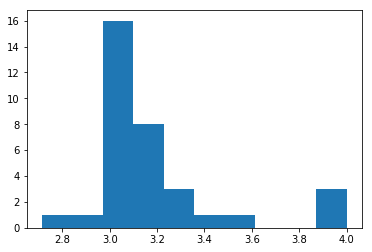

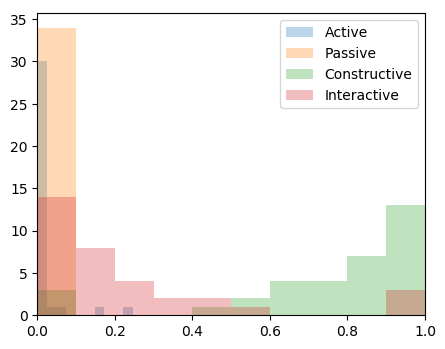

In [203]:
# mean+ratio PACI by student in semester1 t2
density_plot(df_s1_t2, ['Student ID'])

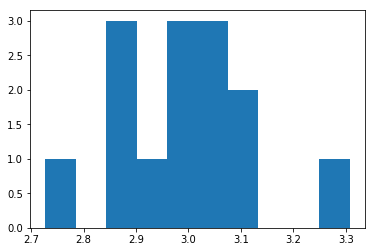

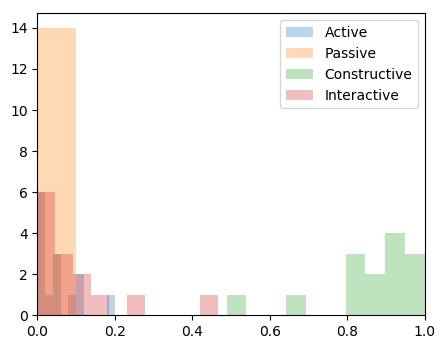

In [204]:
# mean+ratio PACI by group in semester1 t1
density_plot(df_s1_t1, ['Group ID'])

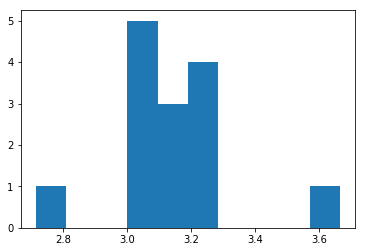

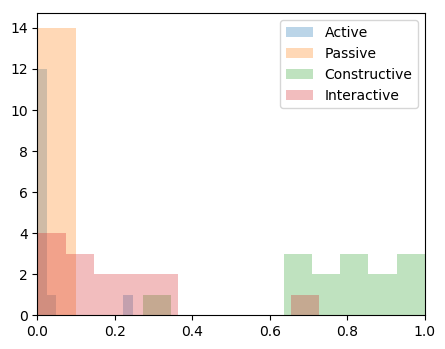

In [205]:
# mean+ratio PACI by group in semester1 t2
density_plot(df_s1_t2, ['Group ID'])

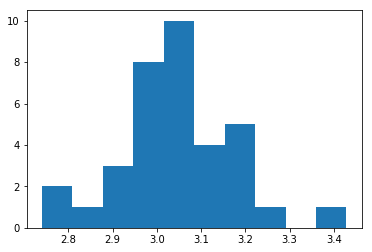

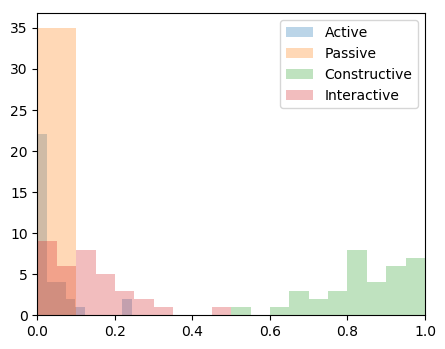

In [206]:
# mean+ratio PACI by student in semester1
density_plot(df_s1, ['Student ID'])

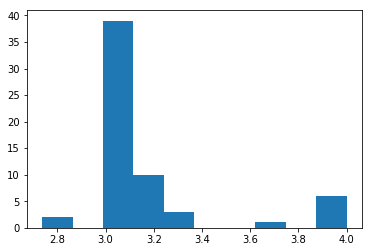

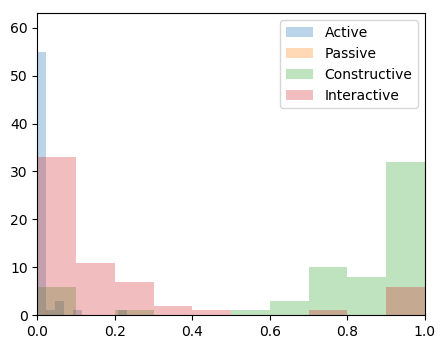

In [207]:
# mean+ratio PACI by student in semester2
density_plot(df_s2, ['Student ID'])

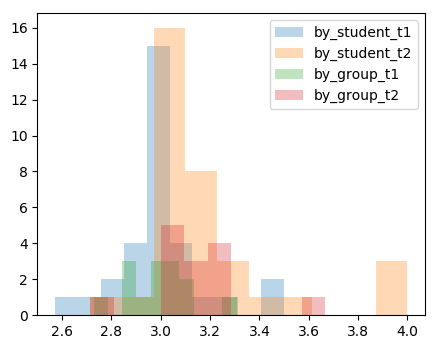

In [208]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
plt.hist(PACI_mean_combine[0], alpha=0.3, label='by_student_t1')
plt.hist(PACI_mean_combine[1], alpha=0.3, label='by_student_t2')
plt.hist(PACI_mean_combine[2], alpha=0.3, label='by_group_t1')
plt.hist(PACI_mean_combine[3], alpha=0.3, label='by_group_t2')
plt.legend()

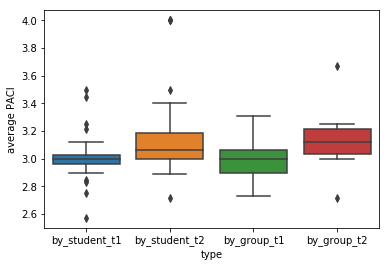

In [209]:
s1 = pd.DataFrame(PACI_mean_combine[0])
s1.columns=['average PACI']
s1.index.names = ['ID']
s1['type'] = 'by_student_t1'

s2 = pd.DataFrame(PACI_mean_combine[1])
s2.columns=['average PACI']
s2.index.names = ['ID']
s2['type'] = 'by_student_t2'

g1 = pd.DataFrame(PACI_mean_combine[2])
g1.columns=['average PACI']
g1.index.names = ['ID']
g1['type'] = 'by_group_t1'

g2 = pd.DataFrame(PACI_mean_combine[3])
g2.columns=['average PACI']
g2.index.names = ['ID']
g2['type'] = 'by_group_t2'

combine = pd.concat([s1, s2, g1, g2], axis=0, sort=False)
ax = sns.boxplot(x="type", y="average PACI", data=combine)

# Heatmap (with group containing more than one student)

### Define the function

In [271]:
from scipy.spatial import distance_matrix
def meanPACI(tmp, ID):
    PACI = tmp.groupby(ID)["Passive", "Active","Constructive","Interactive"]
    PACI_sum = PACI.sum()
    Student_count = tmp.groupby(ID)['ID'].count()
    PACI_mean = PACI_sum.sum(axis=1)/Student_count
    dd = pd.DataFrame(PACI_mean, columns=['meanPACI'])
    return dd
    #print(len(PACI_mean))

### Heatmap on students in semester1 t1 (distance matrix: mean PACI)

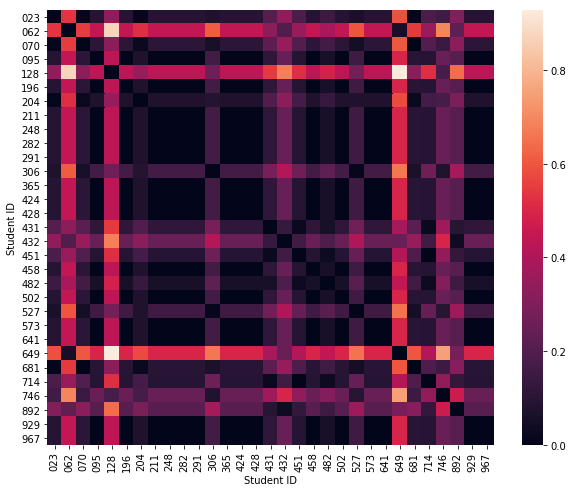

In [269]:
df = meanPACI(df_s1_t1, ['Student ID'])
mt = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(mt, xticklabels=mt.columns, yticklabels=mt.columns, ax=ax)

### Heatmap on students in semester1 t2 (distance matrix: mean PACI)

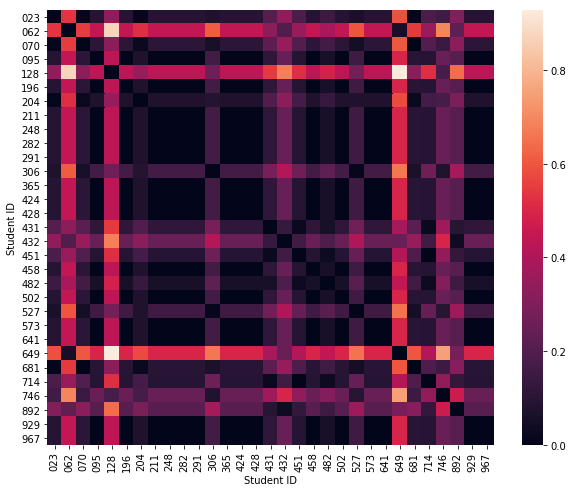

In [270]:
df = meanPACI(df_s1_t2, ['Student ID'])
mt = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(mt, xticklabels=mt.columns, yticklabels=mt.columns, ax=ax)